In [1]:
import nltk


In [2]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
speech = """Soldiers of my Old Guard: I bid you farewell. 
            For twenty years I have constantly accompanied you on the road to honor and glory. 
            In these latter times, as in the days of our prosperity, you have invariably been models of courage and fidelity. 
            With men such as you our cause could not be lost; but the war would have been interminable; 
            it would have been civil war, and that would have entailed deeper misfortunes on France.
            I have sacrificed all of my interests to those of the country. I go, but you, my friends, 
            will continue to serve France. Her happiness was my only thought. It will still be the object of my wishes. 
            Do not regret my fate; if I have consented to survive, it is to serve your glory. 
            I intend to write the history of the great achievements we have performed together. 
            Adieu, my friends. Would I could press you all to my heart."""

In [6]:
sentences = nltk.sent_tokenize(speech)
print(sentences)

['Soldiers of my Old Guard: I bid you farewell.', 'For twenty years I have constantly accompanied you on the road to honor and glory.', 'In these latter times, as in the days of our prosperity, you have invariably been models of courage and fidelity.', 'With men such as you our cause could not be lost; but the war would have been interminable; \n            it would have been civil war, and that would have entailed deeper misfortunes on France.', 'I have sacrificed all of my interests to those of the country.', 'I go, but you, my friends, \n            will continue to serve France.', 'Her happiness was my only thought.', 'It will still be the object of my wishes.', 'Do not regret my fate; if I have consented to survive, it is to serve your glory.', 'I intend to write the history of the great achievements we have performed together.', 'Adieu, my friends.', 'Would I could press you all to my heart.']


In [10]:
sentences[0]

'Soldiers of my Old Guard: I bid you farewell.'

In [7]:
sentences[1]

'For twenty years I have constantly accompanied you on the road to honor and glory.'

In [8]:
sentences[2]

'In these latter times, as in the days of our prosperity, you have invariably been models of courage and fidelity.'

In [9]:
sentences[3]

'With men such as you our cause could not be lost; but the war would have been interminable; \n            it would have been civil war, and that would have entailed deeper misfortunes on France.'

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vector = CountVectorizer()
vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
X = vector.fit_transform(sentences)

In [14]:
X

<12x90 sparse matrix of type '<class 'numpy.int64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [1]:
#Import all essential items.

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB 
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,0.638298,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,0.638298,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.703300,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.000000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [2]:
samples = df["text"]

x = []
y = []

polarity = 0
subject = 0

for item in samples:
    
    snip = TextBlob(item)
    current = snip.sentiment
    
    for value in current:
        polarity = snip.sentiment.polarity
        x.append(polarity)
            
        subject = snip.sentiment.subjectivity
        y.append(subject)

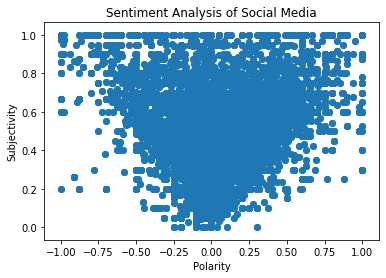

In [3]:
plt.scatter(x,y)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis of Social Media")
plt.show()

Text(0.5, 1.0, 'Polarity')

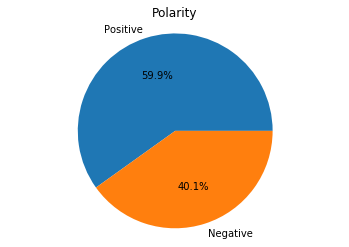

In [4]:
label_one = 'Positive', 'Negative'

size_one = 0
size_two = 0

for x_values in x:
    
    #Positive Polarity
    if (x_values > 0 and x_values <= 1):
        size_one += 1
    
    #Negative Polarity    
    elif (x_values < 0 and x_values >= -1):
        size_two += 1

   
        
        
sizes_polarity = [size_one, size_two]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_polarity, labels = label_one, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Polarity")



Text(0.5, 1.0, 'Subjectivity')

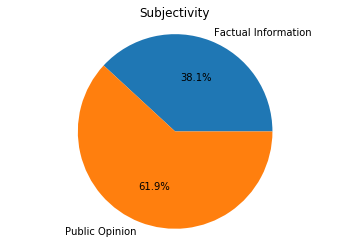

In [5]:
label_two = 'Factual Information', 'Public Opinion'

size_one = 0
size_two = 0

for y_values in y:
    
    #Tending Towards Public Opinion
    if (y_values >= 0.5 and y_values <= 1):
        size_one += 1
    
    #Tending Towards Factual Information    
    elif (y_values >= 0 and y_values <= 0.5):
        size_two += 1

        
        
sizes_subject = [size_one, size_two]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_subject, labels = label_two, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Subjectivity")



Text(0.5, 1.0, 'Complete Comparisons')

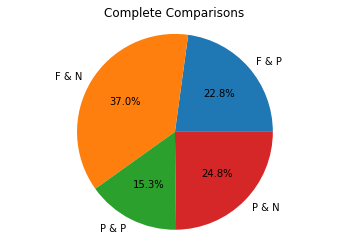

In [6]:
labels_general = "F & P", "F & N", "P & P", "P & N"

size_one = 0
size_two = 0
size_three = 0
size_four = 0

for x_values in x: 
    for y_values in y:
        #Positive Polarity and Public Opinion
        if (x_values > 0 and x_values <= 1 and y_values >= 0.5 and y_values <= 1):
            size_one += 1
        
        #Positive Polarity and Factual Information
        elif (x_values > 0 and x_values <= 1 and y_values >= 0 and y_values <= 0.5):
            size_two += 1
        
        #Negative Polarity and Public Opinion    
        elif (x_values < 0 and x_values >= -1 and y_values >= 0.5 and y_values <= 1):
            size_three += 1
        
        #Negative Polarity and Factual Information
        elif (x_values < 0 and x_values >= -1 and y_values >= 0 and y_values <= 0.5):
            size_four += 1

        
sizes_complete = [size_one, size_two, size_three, size_four]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_complete, labels = labels_general, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Complete Comparisons")
    

Negative:  9178
Positive:  2363
Neutral:   3099


Text(0.5, 1.0, 'Sentiment Count')

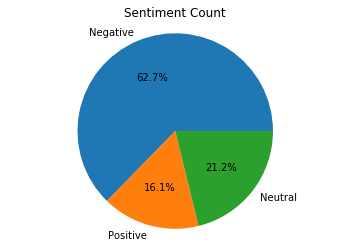

In [7]:
data = df['airline_sentiment']

label_item = 'Negative', 'Positive', 'Neutral'


count1 = 0
count2 = 0
count3 = 0

for item in data:
    if item == 'negative':
        count1+=1
    elif item == 'positive':
        count2+=1
    elif item == 'neutral':
        count3+=1

print('Negative: ', count1)
print('Positive: ', count2)
print('Neutral:  ',  count3)

sizes_subject = [count1, count2, count3]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_subject, labels = label_item, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Sentiment Count")


Text(0.5, 1.0, 'Confidence of Negative Grievances Against Different Airlines')

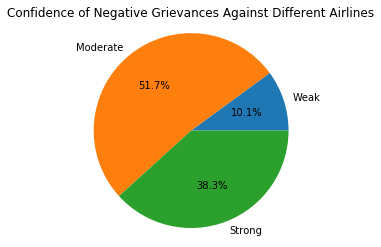

In [8]:
#Virgin America, United, Southwest, Delta, 
#US Airways, and American.

data = df['airline']
data_negative = df['negativereason_confidence']
label_one = 'Weak','Moderate','Strong'

size_one = 0
size_two = 0
size_three = 0

for plane_values in data:
    for negatives in data_negative:
        if (negatives >= 0 and negatives <= 0.3333):
            size_one+=1
        elif (negatives >= 0.3333 and negatives <= 0.6666):
            size_two+=1
        elif (negatives >= 0.6666 and negatives <= 1):
            size_three+=1
    
    
        
sizes_negative = [size_one, size_two, size_three]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_negative, labels = label_one, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Confidence of Negative Grievances Against Different Airlines")
